## --- Machine Learning Assignment 1: House Price Prediction ---

### OBJECTIVE

To predict the Price of Houses based on the various parameters in King County - USA.

**Target (Response) Variable** - Price

**Explanatory Variable (Predictors)** - Multivariate: i). Sq. Ft Size, ii). No. of Bedrooms, iii). No. of Bathrooms, iv). Location etc.
                                        


### ---- Importing Packages ---- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics
%matplotlib inline

### ---- Reading Training Data ---- 

In [2]:
train_dt = pd.read_csv(r'C:\Users\Saara\Desktop\R\house_train_data.csv')

### --- EDA ---

In [3]:
train_dt.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [4]:
train_dt.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [5]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

### ---- Finding individual count for all categorical variables: ----

In [6]:
# 1. Bedrooms.
train_dt['bedrooms'].value_counts()

3     4417
4     3094
2     1255
5      755
6      116
1       88
7       17
8        7
0        6
9        3
11       1
10       1
33       1
Name: bedrooms, dtype: int64

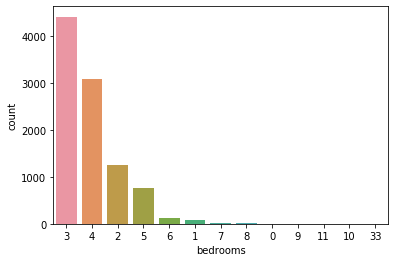

In [7]:
# Plotting above details
sns.countplot(train_dt.bedrooms,order=train_dt['bedrooms'].value_counts().index)

In [8]:
# 2. Grade of House.
train_dt['grade'].value_counts()

7     4067
8     2707
9     1192
6      914
10     532
11     172
5      107
12      45
4       17
13       7
1        1
Name: grade, dtype: int64

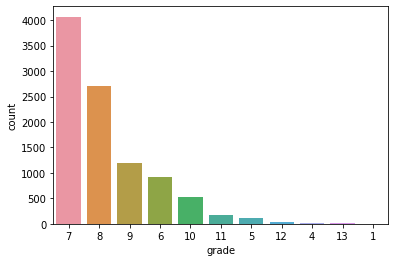

In [9]:
# Plotting above details
sns.countplot(train_dt.grade,order=train_dt['grade'].value_counts().index)

In [10]:
# 3. Condition of house.
train_dt['condition'].value_counts()

3    6291
4    2610
5     772
2      78
1      10
Name: condition, dtype: int64

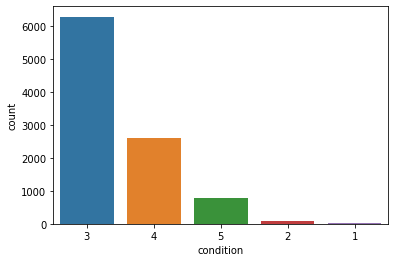

In [11]:
# Plotting above details
sns.countplot(train_dt.condition,order=train_dt['condition'].value_counts().index)

In [12]:
## No. of houses less than 250sq ft. of living area / bedroom, which would be very rarely possible
train_dt[train_dt.sqft_living/train_dt.bedrooms<250]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
142,4337000335,20141122T000000,268750.0,4,1.00,800,8775,1.0,0,0,...,6,800,0,1943,0,98166,47.4800,-122.336,1310,8775
541,3523029041,20141009T000000,290000.0,2,0.75,440,8313,1.0,1,3,...,5,440,0,1943,0,98070,47.4339,-122.512,880,26289
2467,3980300020,20150310T000000,340000.0,3,1.00,670,23522,1.0,0,0,...,6,670,0,1968,0,98024,47.5329,-121.890,1880,20270
2899,862000020,20150206T000000,800000.0,6,1.00,1430,20620,2.0,0,0,...,7,1430,0,1954,0,98004,47.6255,-122.209,2450,10080
2905,7452500190,20141016T000000,345000.0,3,1.75,710,5050,1.0,0,0,...,6,710,0,1950,0,98126,47.5194,-122.375,900,5050
4852,2202500135,20141118T000000,333000.0,5,1.75,1240,8936,1.0,0,0,...,7,1240,0,1954,0,98006,47.5738,-122.136,1600,9341
5231,3580900260,20140505T000000,340000.0,5,1.00,1120,9022,1.5,0,0,...,7,1120,0,1962,0,98034,47.7296,-122.240,1310,7500
6404,8850000180,20150420T000000,295000.0,4,1.00,980,3000,1.5,0,0,...,7,980,0,1914,0,98144,47.5892,-122.312,1525,3000
7204,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


### ---- Removing above Anomalies ----

In [13]:
train_dt = train_dt[~(train_dt.sqft_living/train_dt.bedrooms<250)]
train_dt.shape

(9752, 21)

#### ---- Highly priced houses ----

In [14]:
# Finding price / sq ft to see which houses are highly priced
train_dt2 = train_dt.copy()
train_dt2['price_per_sqft'] = train_dt['price']/train_dt['sqft_living']
train_dt2.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,226.014760
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,403.448276
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,216.783217
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,291.970803
5,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,1980,970,1979,0,98126,47.5714,-122.375,2140,4000,220.338983
6,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,1.5,0,0,...,1600,0,1916,0,98103,47.6648,-122.343,1610,4300,303.125000
7,6300500875,20140514T000000,385000.0,4,1.75,1620,4980,1.0,0,0,...,860,760,1947,0,98133,47.7025,-122.341,1400,4980,237.654321
8,7137970340,20140703T000000,285000.0,5,2.50,2270,6300,2.0,0,0,...,2270,0,1995,0,98092,47.3266,-122.169,2240,7005,125.550661
9,8091400200,20140516T000000,252700.0,2,1.50,1070,9643,1.0,0,0,...,1070,0,1985,0,98030,47.3533,-122.166,1220,8386,236.168224


In [15]:
train_dt2.describe().T

,count,mean,std,min,25%,50%,75%,max
id,9752.0,4.605725e+09,2.876419e+09,1.200019e+06,2.126049e+09,3.905061e+09,7.340102e+09,9.900000e+09
price,9752.0,5.428614e+05,3.796431e+05,8.000000e+04,3.200000e+05,4.500000e+05,6.490000e+05,7.700000e+06
bedrooms,9752.0,3.372334e+00,9.122653e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.100000e+01
bathrooms,9752.0,2.118001e+00,7.737636e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,9752.0,2.087736e+03,9.269693e+02,2.900000e+02,1.420000e+03,1.920000e+03,2.570000e+03,1.205000e+04
sqft_lot,9752.0,1.521974e+04,4.128503e+04,5.200000e+02,5.100000e+03,7.640000e+03,1.066000e+04,1.651359e+06
floors,9752.0,1.486311e+00,5.324004e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,9752.0,8.305989e-03,9.076257e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,9752.0,2.479491e-01,7.877158e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,9752.0,3.415197e+00,6.504787e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [16]:
expsv_homes = train_dt2.loc[train_dt2['price_per_sqft']>320,'zipcode'].value_counts()
expsv_homes
print('No of Highly Priceed houses (greater than 75% of houses):',sum(expsv_homes))

No of Highly Priceed houses (greater than 75% of houses): 2370


### Understanding variables having effect on price

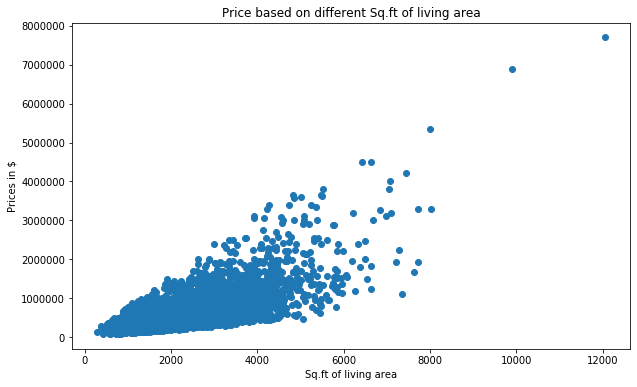

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(train_dt.sqft_living, train_dt.price)
plt.title("Price based on different Sq.ft of living area")
plt.xlabel('Sq.ft of living area')
plt.ylabel('Prices in $')
plt.show()

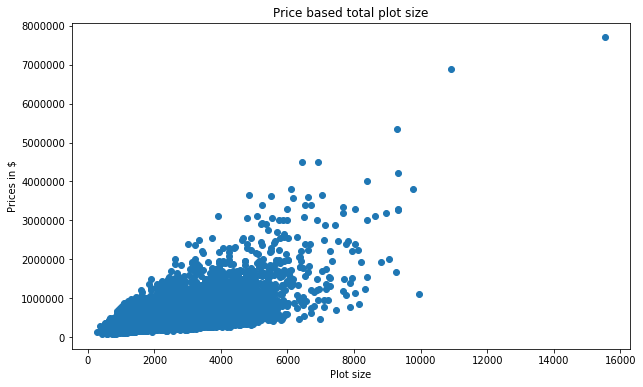

In [18]:
plt.figure(figsize=(10,6))
plt.scatter((train_dt['sqft_living']+train_dt['sqft_basement']),train_dt['price'])
plt.title("Price based total plot size")
plt.xlabel('Plot size')
plt.ylabel('Prices in $')
plt.show()

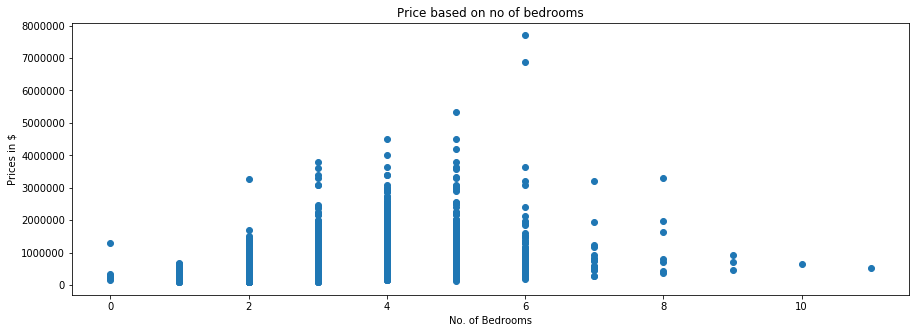

In [19]:
plt.figure(figsize=(15,5))
plt.scatter(train_dt.bedrooms, train_dt.price)
plt.title("Price based on no of bedrooms")
plt.xlabel('No. of Bedrooms')
plt.ylabel('Prices in $')
plt.show()

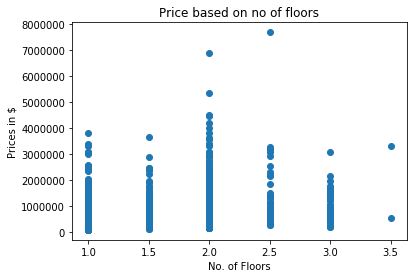

In [20]:
plt.scatter(train_dt.floors,train_dt.price)
plt.title("Price based on no of floors")
plt.xlabel('No. of Floors')
plt.ylabel('Prices in $')
plt.show()

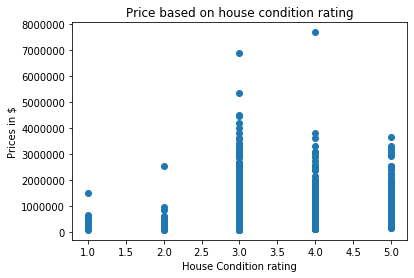

In [21]:
plt.scatter(train_dt.condition,train_dt.price)
plt.title("Price based on house condition rating")
plt.xlabel('House Condition rating')
plt.ylabel('Prices in $')
plt.show()

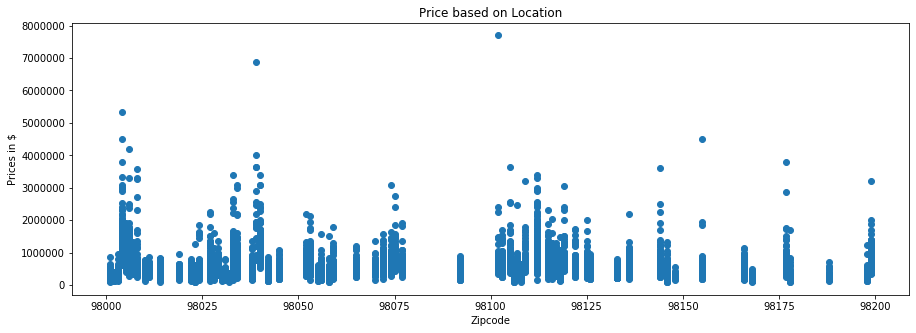

In [22]:
plt.figure(figsize=(15,5))
plt.scatter(train_dt.zipcode,train_dt.price)
plt.title("Price based on Location")
plt.xlabel('Zipcode')
plt.ylabel('Prices in $')
plt.show()

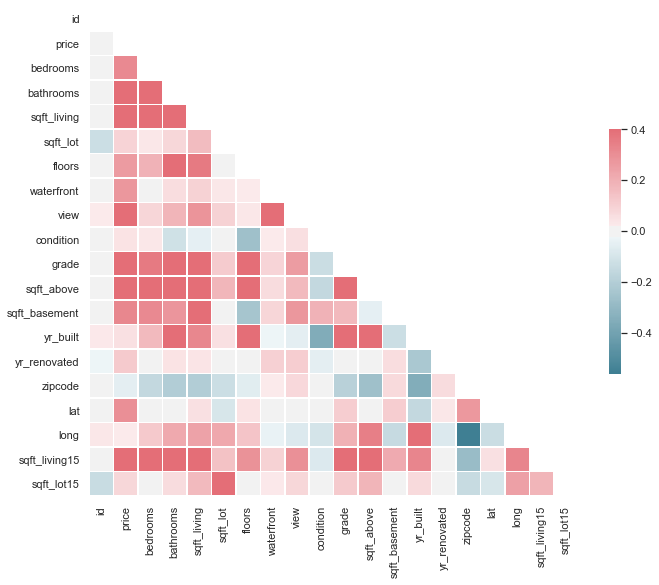

In [23]:
sns.set(style="white")

# Compute the correlation matrix
cor = train_dt.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cor, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.4, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [24]:
# Creating dummy variable for zipcode
zip_dummy = pd.get_dummies(train_dt['zipcode'])
train_dt = pd.concat([train_dt,zip_dummy],axis=1)
train_dt

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9758,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ---- Multi Linear Regression on Training data ----

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
# Drop date, id column

train_dt = train_dt.drop(["id","date"],axis=1)

In [27]:
# Removing variables not significant

var_rm = ['price','zipcode','sqft_living15','sqft_lot15','lat','long','sqft_basement','sqft_above','sqft_lot',
               'yr_built','yr_renovated']

In [28]:
train_dt

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
1,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,...,0,0,0,0,0,0,0,0,0,0
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
9757,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0
9758,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0
9759,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_train = train_dt[list(set(train_dt.columns) - set(var_rm))]
X_train

,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,...,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9757,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
Y_train = train_dt["price"].values

In [31]:
reg = LinearRegression()

model1 = reg.fit(X_train,Y_train)
print("Training Data Accuracy",reg.score(X_train,Y_train))

Training Data Accuracy 0.7988773848784799


In [32]:
y_pred1 = reg.predict(X_train)

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(train_dt[['price']].values, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(train_dt[['price']].values, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_dt[['price']].values, y_pred1)))

Mean Absolute Error: 100759.18676786654
Mean Squared Error: 28984610409.90352
Root Mean Squared Error: 170248.67227060397


### ---- Multi Linear Regression on Validation data ----

In [34]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

valid_dt = pd.read_csv(r'C:\Users\Saara\Desktop\R\house_valid_data.csv')

# Creating dummy variable for zipcode
zip_dummy = pd.get_dummies(valid_dt['zipcode'])
valid_dt = pd.concat([valid_dt,zip_dummy],axis=1)

    
valid_dt = valid_dt.drop(["id","date"],axis=1)

var_rm = ['price','zipcode','sqft_living15','sqft_lot15','lat','long','sqft_basement','sqft_above','sqft_lot',
           'yr_built','yr_renovated']

X_valid = valid_dt[list(set(valid_dt.columns) - set(var_rm))]

Y_valid = valid_dt["price"].values

reg = LinearRegression()

model_vld = reg.fit(X_valid,Y_valid)
print("Validation Data Accuracy",reg.score(X_valid,Y_valid))

y_pred2 = reg.predict(X_valid)

print('Mean Absolute Error - Validation data:', metrics.mean_absolute_error(valid_dt[['price']].values, y_pred2))
print('Mean Squared Error - Validation data:', metrics.mean_squared_error(valid_dt[['price']].values, y_pred2))
print('Root Mean Squared Error - Validation data:', np.sqrt(metrics.mean_squared_error(valid_dt[['price']].values, y_pred2)))

Validation Data Accuracy 0.8029964234014241
Mean Absolute Error - Validation data: 95467.72425767234
Mean Squared Error - Validation data: 24991266471.007244
Root Mean Squared Error - Validation data: 158086.26275235697


### ---- Multi Linear Regression on Test data ----

In [35]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

test_dt = pd.read_csv(r'C:\Users\Saara\Desktop\R\house_test_data.csv')

# Creating dummy variable for zipcode
zip_dummy = pd.get_dummies(test_dt['zipcode'])
test_dt = pd.concat([test_dt,zip_dummy],axis=1)
test_dt
    
test_dt = test_dt.drop(["id","date"],axis=1)

var_rm = ['price','zipcode','sqft_living15','sqft_lot15','lat','long','sqft_basement','sqft_above','sqft_lot',
           'yr_built','yr_renovated']

X_test = test_dt[list(set(test_dt.columns) - set(var_rm))]

Y_test = test_dt["price"].values

reg = LinearRegression()

model_test = reg.fit(X_test,Y_test)
print("Validation Data Accuracy",reg.score(X_test,Y_test))

y_pred3 = reg.predict(X_test)

print('Mean Absolute Error - Validation data:', metrics.mean_absolute_error(test_dt[['price']].values, y_pred3))
print('Mean Squared Error - Validation data:', metrics.mean_squared_error(test_dt[['price']].values, y_pred3))
print('Root Mean Squared Error - Validation data:', np.sqrt(metrics.mean_squared_error(test_dt[['price']].values, y_pred3)))

Validation Data Accuracy 0.8170234594282313
Mean Absolute Error - Validation data: 97734.48800240115
Mean Squared Error - Validation data: 23495756061.596992
Root Mean Squared Error - Validation data: 153283.25434174796
